In [122]:
import numpy as np
import matplotlib.pyplot as plt

In [123]:
mu0 = 4*np.pi*1e-7

In [124]:
# Here we define all of the characteristics of the conducting disc that are important for our calculations
# our disc is made of copper

radius = .25 # radius of our disc (meters)
thickness = .03 # thickness of our disc (meters)
density = 8960 # density of our disc (kg/M^3)
area = np.pi*radius**2
volume = (np.pi)*(radius**2)*(thickness) # volume of our disc (M^3)
mass = volume*density # mass of our disc (kg)
mI = (.5)*(mass)*(radius**2) # moment of inertia of our disc
resistivity = 1.68e-8 # resistivity of copper
resistance = (resistivity*((np.pi*radius) + (2*radius)))/(thickness**2) # estimated total resistance of current path
angular_translational_velocity = frequency*radius

print("Radius:", radius, "m")
print("Thickness:", thickness, "m")
print("Area:", area, "M^2")
print("Volume:", volume, "m^3")
print("Mass:", mass, "kg")
print("Moment of Inertia:", mI)
print("Resistance of disc:", resistance,"Ohms")

Radius: 0.25 m
Thickness: 0.03 m
Area: 0.19634954084936207 M^2
Volume: 0.005890486225480862 m^3
Mass: 52.778756580308524 kg
Moment of Inertia: 1.6493361431346414
Resistance of disc: 2.3994099050085704e-05 Ohms


In [125]:
# Here we define other constants that are also important
# half of the disc is in the B-field at any one time

B_field = 1 # magnitude of the B-field through our (T)
area_in_B_field = (np.pi)*(radius**2)*(.5) #area of our disc with B-field running through it (M^2)
frequency = 15 # frequency of revolution of our disc in (rad/s)
delta_area = (1/(2*np.pi))*(2)*frequency*area_in_B_field # Change of area-in-B-field per second for calculating flux (M^2/s) 

print("Magnetic field strength:", B_field, "T")
print("Disc area affected by B field:", area_in_B_field,"M^2")
print("frequency in revolutions per second:", frequency,"RPS")
print("change of area in B field per second:", delta_area, "M^2/s")

Magnetic field strength: 1 T
Disc area affected by B field: 0.09817477042468103 M^2
frequency in revolutions per second: 15 RPS
change of area in B field per second: 0.46875 M^2/s


In [126]:
# Here we will define the variable that we'll use in our loop while simulating induction braking. 

t = 5
dt = 1e-4

x = np.arange(0,t,dt)

magnetic_flux_through_disc = B_field * area_in_B_field #magnetic flux at a moment in time 
delta_flux = B_field * delta_area #induced current in our disc at any given time
induced_emf = -delta_flux # the induced voltage in our copper disc
induced_current = induced_emf/resistance
power = (induced_current**2)*(resistance)
torque = power/frequency
acceleration = torque/mI


In [127]:
power_array = np.zeros(np.shape(x))
frequency_array = np.zeros(np.shape(x))
acceleration_array = np.zeros(np.shape(x))

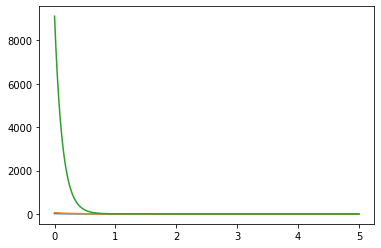

In [128]:
# Here we execute a loop to simulate eddy current braking 

for n,time in enumerate (x):
    frequency = frequency - acceleration*dt
    delta_area = (1/(2*np.pi))*(2)*frequency*area_in_B_field
    delta_flux = B_field * delta_area
    induced_current = -delta_flux/resistance
    power = (induced_current**2)*(resistance)
    torque = power/(frequency*np.pi*2)
    acceleration = torque/mI

    acceleration_array[n] = acceleration
    power_array[n] = power
    frequency_array[n] = frequency
    
plt.plot(x,frequency_array)
plt.plot(x,acceleration_array)
plt.plot(x,power_array)